In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from plot_keras_history import show_history, plot_history

2024-04-13 11:39:41.429311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 11:39:41.465725: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 11:39:41.465752: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 11:39:41.465780: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 11:39:41.472053: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-13 11:39:41.472547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Reading-In Data

In [ ]:
pd.options.display.max_seq_items = 200
df_ml = pd.read_csv('../data/data_ml_chapter_1.csv')
print(df_ml.columns)

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

## Organizing Feature Names

In [ ]:
columns_to_drop = [
    'stock_id', 'date', # non-feature identifiers
    'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd', # possible numeric features 
    'R1M_Usd_median', 'R12M_Usd_median', # medians used for calculating categorical
    'R1M_Usd_C', 'R12M_Usd_C' # possible categorical features
]

In [ ]:
df_ml.drop(columns=columns_to_drop).columns

Index(['Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd', 'Asset_Turnover',
       'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales', 'Cash_Div_Cf',
       'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld', 'Dps', 'Ebit_Bv',
       'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin', 'Eps', 'Eps_Basic',
       'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev', 'Ev_Ebitda',
       'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin', 'Fcf_Noa', 'Fcf_Oa',
       'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld', 'Free_Ps_Cf', 'Int_Rev',
       'Interest_Expense', 'Mkt_Cap_12M_Usd', 'Mkt_Cap_3M_Usd',
       'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd', 'Mom_Sharp_11M_Usd',
       'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt', 'Net_Debt_Cf',
       'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin', 'Ni_Oa',
       'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_Cf', 'Pb', 'Pe', 'Pt

In [ ]:
# this first line is how they do it in the book and it seems to be wrong
#features = list(df_ml.iloc[:,3:95].columns) # Keep the feature's column names (hard-coded, beware!)
features = list(df_ml.drop(columns=columns_to_drop).columns)

features_short = [
    'Div_Yld',
    'Eps', 
    'Mkt_Cap_12M_Usd', 
    'Mom_11M_Usd', 
    'Ocf',
    'Pb', 
    'Vol1Y_Usd',
]

## Training Data and Test Data

In [ ]:
separation_date = '2014-01-15'
df_train = df_ml.query('date < @separation_date')
df_test = df_ml.query('date >= @separation_date')

# training data
X_train = df_train[features]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[features] # Predictors
y_test = df_test['R1M_Usd'] # Dependent variable

## Vanilla MLP

### Regression Example

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(len(features),)))
model.add(layers.Dense(8, activation="tanh"))
model.add(layers.Dense(1))

model.compile(optimizer='RMSprop', 
              loss='mse', 
              metrics=['MeanAbsoluteError'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1504      
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1649 (6.44 KB)
Trainable params: 1649 (6.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
774/774 [==============================] - 2s 2ms/step - loss: 0.0476 - mean_absolute_error: 0.1075 - val_loss: 0.0370 - val_mean_absolute_error: 0.0665
Epoch 2/10
774/774 [==============================] - 1s 1ms/step - loss: 0.0290 - mean_absolute_error: 0.0840 - val_loss: 0.0371 - val_mean_absolute_error: 0.0670
Epoch 3/10
774/774 [==============================] - 1s 2ms/step - loss: 0.0290 - mean_absolute_error: 0.0839 - val_loss: 0.0370 - val_mean_absolute_error: 0.0666
Epoch 4/10
774/774 [==============================] - 1s 2ms/step - loss: 0.0290 - mean_absolute_error: 0.0839 - val_loss: 0.0370 - val_mean_absolute_error: 0.0668
Epoch 5/10
774/774 [==============================] - 1s 2ms/step - loss: 0.0289 - mean_absolute_error: 0.0839 - val_loss: 0.0370 - val_mean_absolute_error: 0.0667
Epoch 6/10
774/774 [==============================] - 1s 2ms/step - loss: 0.0289 - mean_absolute_error: 0.0839 - val_loss: 0.0371 - val_mean_absolute_error: 0.0678
Epoch 7/10
774/7

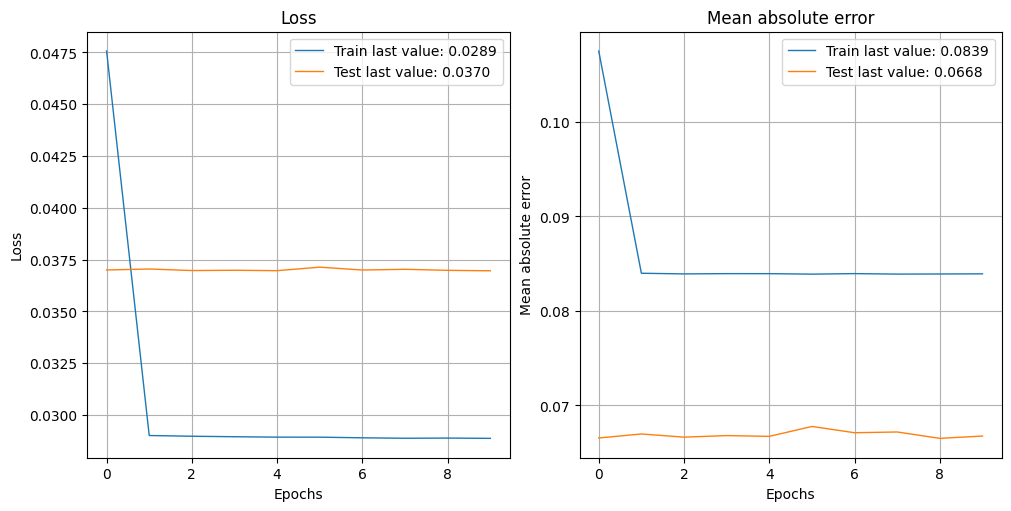

In [ ]:
fit_NN = model.fit(
            X_train,
            y_train,
            batch_size=256,
            epochs = 10,
            validation_data=(X_test, y_test),
            verbose = True
)
show_history(fit_NN)

In [ ]:
hitratio = np.mean(model.predict(X_test).ravel() * y_test > 0)
print(f'Hit Ratio: {hitratio}')

2194/2194 [==============================] - 2s 729us/step
Hit Ratio: 0.5272760938924339


## Classification Example

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_C = to_categorical(df_train['R1M_Usd_C'].values) # One-hot encoding of the label
y_test_C = to_categorical(df_test['R1M_Usd_C'].values) # One-hot encoding of the label

In [ ]:
from tensorflow.keras import initializers
from tensorflow.keras.constraints import non_neg

# Usage in a Keras layer:
initializer =initializers.RandomNormal()

model_C = keras.Sequential() # This defines the structure of the network, i.e. how layers are organized
model_C.add(layers.Dense(16, activation="tanh",           # Nb units & activation
                       input_shape=(len(features),),    # Size of input
                       kernel_initializer=initializer,  # Initialization of weights
                       kernel_constraint = non_neg()))   # Weights should be nonneg
model_C.add(layers.Dropout(.25))                          # Dropping out 25% units
model_C.add(layers.Dense(8, activation="elu",             # Nb units & activation
                       bias_initializer = initializers.Constant(0.2), # Initialization of biases
                       kernel_regularizer='l2'))        # Penalization of weights 
model_C.add(layers.Dense(2,activation='softmax'))         # Softmax for categorical output

In [ ]:
model_C.compile(   # Model specification
        optimizer=keras.optimizers.Adam(
                learning_rate=0.01,  # Optimisation method (weight updating)
                beta_1 = 0.9, # The exponential decay rate for the 1st moment estimates
                beta_2 = 0.95), # The exponential decay rate for the 2nd moment estimates
              loss=keras.losses.BinaryCrossentropy(from_logits=True),   # Loss function
              metrics=['categorical_accuracy'])  # Output metric
model_C.summary() # Model structure

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                1504      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1658 (6.48 KB)
Trainable params: 1658 (6.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20


/home/pritam/.local/lib/python3.10/site-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


387/387 [==============================] - 1s 2ms/step - loss: 0.6996 - categorical_accuracy: 0.5009 - val_loss: 0.6933 - val_categorical_accuracy: 0.5037
Epoch 2/20
  1/387 [..............................] - ETA: 1s - loss: 0.6946 - categorical_accuracy: 0.4746

/home/pritam/.local/lib/python3.10/site-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


387/387 [==============================] - 1s 2ms/step - loss: 0.6933 - categorical_accuracy: 0.4997 - val_loss: 0.6932 - val_categorical_accuracy: 0.5037
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 0.6933 - categorical_accuracy: 0.5008 - val_loss: 0.6933 - val_categorical_accuracy: 0.5037
Epoch 4/20
387/387 [==============================] - 1s 2ms/step - loss: 0.6933 - categorical_accuracy: 0.5027 - val_loss: 0.6933 - val_categorical_accuracy: 0.5037
Epoch 5/20
387/387 [==============================] - 1s 2ms/step - loss: 0.6933 - categorical_accuracy: 0.5027 - val_loss: 0.6933 - val_categorical_accuracy: 0.5037


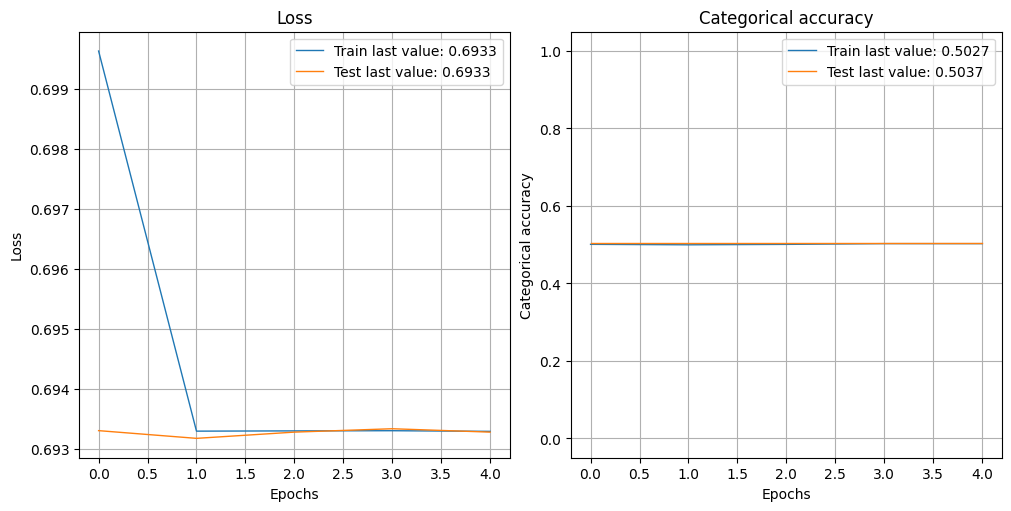

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",    # Early stopping:
                                min_delta = 0.001,       # Improvement threshold
                                patience = 4,            # Nb epochs with no improvmt 
                                verbose = 0 )            # No warnings

fit_NN_C = model_C.fit(
            X_train, # Training features
            y_train_C, # Training labels
            batch_size=512, # Training parameters
            epochs = 20,  # Training parameters
            validation_data=(X_test, y_test_C), # Test data
            verbose = True, # No comments from algo
            callbacks=[callback] # see callback above
            )
show_history(fit_NN_C)

### Custom Losses

In [ ]:
model_custom = keras.Sequential() # this defines the structure of the network, i.e. how layers are organised
model_custom.add(layers.Dense(16, activation="relu", input_shape=(len(features),)))
model_custom.add(layers.Dense(8, activation="sigmoid"))
model_custom.add(layers.Dense(1)) # No activation means linear activation: f(x) = x

In [ ]:
def custom_loss(y_true, y_pred): # Defines the loss, we use gamma = 5
  loss = tf.reduce_mean(tf.square(y_pred - tf.reduce_mean(y_pred))) - 5 * tf.reduce_mean(
          (y_true - tf.reduce_mean(y_true))*(y_pred - tf.reduce_mean(y_pred)))
  return loss
model_custom.compile( # Model specification
              optimizer='RMSprop',  # Optim method
              loss=custom_loss, # New loss function
              metrics=['MeanAbsoluteError'])

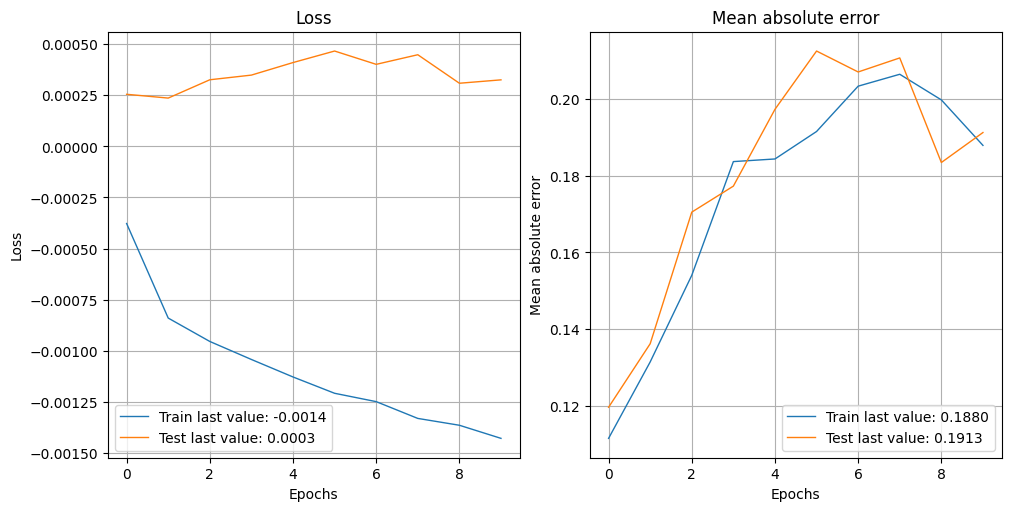

In [ ]:
fit_NN_cust = model_custom.fit(
            X_train, # training features
            y_train, # Training labels
            batch_size=512, epochs = 10, # Training parameters
            validation_data=(X_test, y_test), # Test data
            verbose = False) # No warnings
show_history(fit_NN_cust)

In [ ]:
hitratio = np.mean(model_custom.predict(X_test).ravel() * y_test > 0) # Hit ratio
print(f'Hit Ratio: {hitratio}')

2194/2194 [==============================] - 2s 709us/step
Hit Ratio: 0.44682942114858704


## Recurrent Neural Networks

Skipped this for now.

## Other Common Architectures

Skipped this for now.